# [Poisson Process Simulation](https://timeseriesreasoning.com/2019/10/12/poisson-process-simulation/)

## How to simulate a Poisson process in Python

A Poisson process is a counting process. It is used to model the number of occurrences of events durign a certain period of time, given a certain rate of occurrence of events.   

The Poisson process is based on the Poisson distribution which has the following Probability Mass Function (PMF). The PMF gives us the probability of occurrence of *k* events in time *t*, given that on average $\lambda$ events occur per unit time.  

$$ P_{X}(k) = \frac{(\lambda t)^{k} * e^{-(\lambda t)}} {k!} $$

A Poisson process can be thought of as a sequence of Poisson distributed random variables. In a Poisson process, the time interval between consecutive events follows the exponential probability distribution with the following Probability Distribution Function (PDF):

$$ P_{X}(t) = \lambda e^{-\lambda t} $$  

The Cumulative Probability Distribution (CDF) of inter-event times, which gives the probability that the time bewteen two consecutive events is less than or equal to t is:

$$ CDF = F_{X}(t) = P(X <= t) = \int_{0}^{t} e^{-\lambda x}dx = 1 - e^{-\lambda t} $$

The inverse of the above CDF function will give us the actual time intervales between consecutive events in a Poisson process. The inverse of the above CDF looks like this:

$$ F_{X}^{-1}(t) = \frac{ln(1-t)}{\lambda} $$

To get time between consecutive events, we feed random number from 0 to 1 into this inverse function, i.e. we set *t* to some random value from the uniform distribution *Uniform(0, 1)*.

*This technique of generating random values is known as the Inverse-CDF technique. It is often used in statistical simulation for artificially generating values that conform to some stochastic process's probability distribution function.*

With this background in place, let's simulate a Poisson proccess in Python.

In [ ]:
import random
import math
import statistics
import matplotlib.pyplot as plt

Set the event rate $\lambda$ of the Poisson process to 5 events per unit time. We'll simulate the first 100 events.

In [ ]:
_lambda = 5
_num_events = 100

Initialize a few more variables:

In [ ]:
_event_num = []
_inter_event_times = []
_event_times = []
_event_time = 0

Run the for loop 100 times. In each iteration, use the Inverse-CDF technique to generate the time of the next Poisson distributed event:

In [ ]:
print ('{:^2} {:^20} {:^16}'.format('Event_Num', 'Inter_Event_T', 'Event_T'))

for i in range(_num_events):
    _event_num.append(i)

    # Get a random probability value from the unifrom distribution's PDF
    n = random.random()

    # Generate the inter-event time from the exponential distribution's CDF using the Inverse-CDF technique
    _inter_event_time = -math.log(1.0 - n)/ _lambda
    _inter_event_times.append(_inter_event_time)

    # Add the inter-event time to the running sum to get the next absolute event time
    _event_time += _inter_event_time
    _event_times.append(_event_time)

    # Print it all out
    print ('{:^10} {:^20} {:^20}'.format(i, _inter_event_time, _event_time))

Event_Num    Inter_Event_T         Event_T     
    0      0.20195258344786757  0.20195258344786757 
    1      0.12708085927665497   0.3290334427245225 
    2      0.12661366919300251  0.45564711191752505 
    3      0.020682968210649095  0.4763300801281741 
    4       0.3325757890938326   0.8089058692220068 
    5      0.10572137394494223   0.914627243166949  
    6      0.019004663236566098  0.9336319064035151 
    7      0.015094471009929684  0.9487263774134448 
    8      0.12130354121428984   1.0700299186277347 
    9       0.159383183246586    1.2294131018743206 
    10     0.10858182798756788   1.3379949298618885 
    11     0.04865110277863678   1.3866460326405252 
    12     0.14384201439335698   1.5304880470338822 
    13      0.1773960649053197   1.7078841119392019 
    14     0.05881407633947733   1.7666981882786792 
    15     0.17574321827517136   1.9424414065538507 
    16     0.21670177295373932    2.15914317950759  
    17      0.1809411128216027   2.3400842923291925

Plot all the exponentially distributed inter-event times. Recollet that inter-event times in a Poisson process are exponentially distributed:

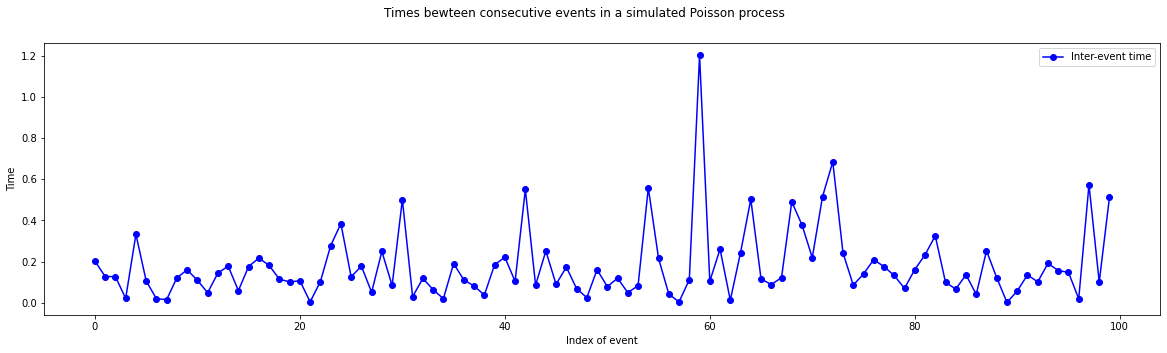

In [ ]:
fig = plt.figure(figsize=(20,5))
fig.suptitle('Times bewteen consecutive events in a simulated Poisson process')
plot, = plt.plot(_event_num, _inter_event_times, 'bo-', label='Inter-event time')

plt.legend(handles = [plot])
plt.xlabel('Index of event')
plt.ylabel('Time')

plt.show()

Also plot the absolute times of the simulated Poisson distributed events:

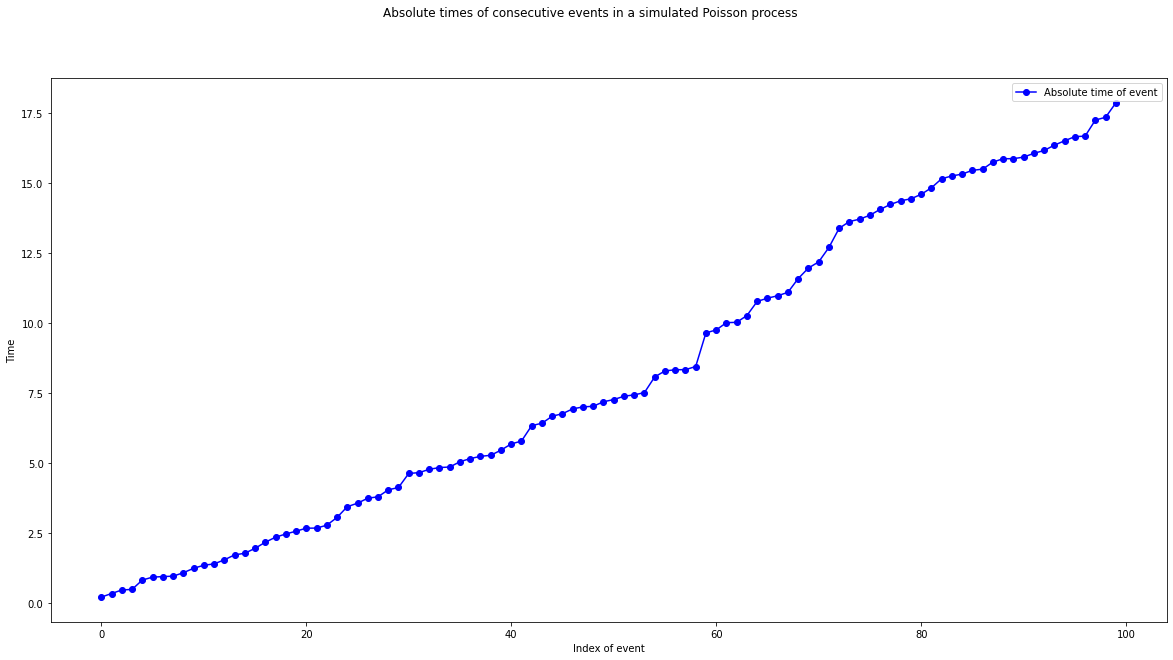

In [ ]:
fig = plt.figure(figsize=(20,10))
fig.suptitle('Absolute times of consecutive events in a simulated Poisson process')
plot, = plt.plot(_event_num, _event_times, 'bo-', label='Absolute time of event')

plt.legend(handles = [plot])
plt.xlabel('Index of event')
plt.ylabel('Time')

plt.show()

Now let's calculate the number of events occurring in consecutive unit time intervales.

In [ ]:
_interval_nums = []
_num_events_in_interval = []
_interval_num = 1
_num_events = 0

print('{:^10} {:^15}'.format('Interval_Num', 'Num_Events'))

for i in range(len(_event_times)):
    _event_time = _event_times[i]
    if _event_time <= _interval_num:
        _num_events += 1
    else:
        _interval_nums.append(_interval_num)
        _num_events_in_interval.append(_num_events)
        print('{:5} {:15}'.format(_interval_num, _num_events))
        _interval_num += 1
        _num_events = 1

Interval_Num   Num_Events   
    1               8
    2               8
    3               7
    4               5
    5               7
    6               7
    7               6
    8               6
    9               5
   10               3
   11               5
   12               3
   13               2
   14               4
   15               6
   16               9
   17               6


Print out the average number of events per unit time. We should expect to see something close to $\lambda = 5$ events to happen per unit time

In [ ]:
print(statistics.mean(_num_events_in_interval))

5.705882352941177


Finally, let's plot the number of events in consecutive time intervals:

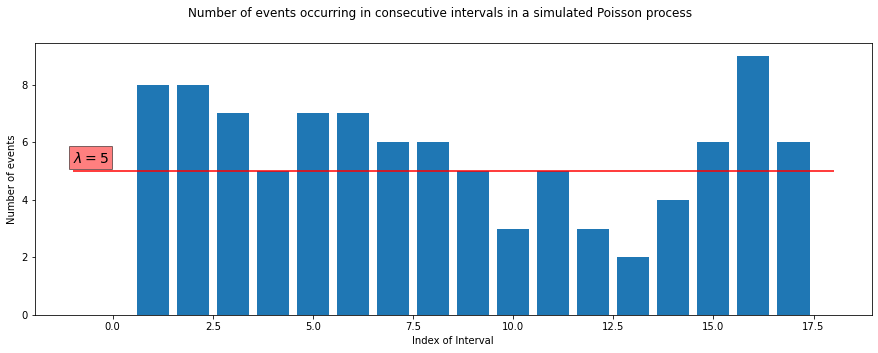

In [39]:
fig = plt.figure(figsize=(15,5))
fig.suptitle('Number of events occurring in consecutive intervals in a simulated Poisson process')
plt.bar(_interval_nums, _num_events_in_interval, )
plt.xlabel('Index of Interval')
plt.ylabel('Number of events')

plt.hlines(y=5, xmin=-1, xmax=_interval_nums[-1]+1, colors='red')
plt.text(-1, 5.3, '$\lambda=5$', fontsize=14, bbox=dict(facecolor='red', alpha=0.5))

plt.show()

The red line on top of the bar plot indicating the average event rate $\lambda = 5$